In [100]:
# インポート
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

print('numpy version:', np.__version__)
print('tensorflow version:', tf.__version__)
print('GPU:', tf.test.gpu_device_name())

numpy version: 1.17.3
tensorflow version: 1.14.0
GPU: 


In [101]:
# データ読み込み関数
def loadData(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1,
                      unpack=False, dtype=str)
    speed = []
    xyzwave = []
    for row in data:
        speed.append(row[1].astype('f8'))
        xyzwave.append(row[2: 2 + 2 * 50].astype('f8'))
    speed = np.array(speed)
    x = np.array(xyzwave)
    t = speed[:, np.newaxis]
    return x, t

In [102]:
# 入力・教師データを対応させたままシャッフル
def shuffleData(x, t):
    zipped = list(zip(x, t))
    np.random.shuffle(zipped)
    x_result, t_result = zip(*zipped)
    return np.asarray(x_result), np.asarray(t_result)

In [103]:
# 学習データとテストデータに分割
def splitData(x, t):
    border = int(len(x) * 0.9)
    return (x[:border], t[:border]), (x[border:], t[border:])

In [104]:
# データの読み込み
# x1, t1 = loadData('ML/data/ML/0912_1800.csv')
# x2, t2 = loadData('ML/data/ML/0912_1815.csv')
# x3, t3 = loadData('ML/data/ML/0925.csv')
# x4, t4 = loadData('ML/data/ML/1010.csv')
# x_all = np.concatenate([x1, x2, x3, x4], axis=0)
# t_all = np.concatenate([t1, t2, t3, t4], axis=0)

x, t = loadData('data/ML_angle/1010.csv')

x_shuffle, t_shuffle = shuffleData(x, t)
(x_train, t_train), (x_test,  t_test) = splitData(x_shuffle, t_shuffle)

In [105]:
# モデル生成
model = keras.Sequential()
model.add(layers.Input(shape=(100,)))
model.add(layers.Dense(100, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense( 70, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense( 40, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense( 10, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(  1))

adam = keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=adam, loss='mse')

In [106]:
# モデルの訓練
result = model.fit(x_train, t_train, epochs=1000)

ple - loss: 1.7858
Epoch 779/1000
1173/1173 [==============================] - 0s 65us/sample - loss: 1.5523
Epoch 780/1000
1173/1173 [==============================] - 0s 65us/sample - loss: 1.4643
Epoch 781/1000
1173/1173 [==============================] - 0s 69us/sample - loss: 1.5869
Epoch 782/1000
1173/1173 [==============================] - 0s 64us/sample - loss: 1.7433
Epoch 783/1000
1173/1173 [==============================] - 0s 62us/sample - loss: 1.6188
Epoch 784/1000
1173/1173 [==============================] - 0s 67us/sample - loss: 1.4968
Epoch 785/1000
1173/1173 [==============================] - 0s 63us/sample - loss: 1.6097
Epoch 786/1000
1173/1173 [==============================] - 0s 64us/sample - loss: 1.5862
Epoch 787/1000
1173/1173 [==============================] - 0s 62us/sample - loss: 1.5961
Epoch 788/1000
1173/1173 [==============================] - 0s 81us/sample - loss: 1.4823
Epoch 789/1000
1173/1173 [==============================] - 0s 66us/sample - loss

In [107]:
# 学習データでテスト
y_train = model.predict(x_train)
error_train = np.abs(t_train - y_train)

# テストデータでテスト
y_test = model.predict(x_test)
error_test  = np.abs(t_test - y_test)

In [108]:
# 誤差率表示
print('error_train_average = {} [deg]'.format(np.average(error_train) * 180/np.pi))
print('error_test_average  = {} [deg]'.format(np.average(error_test)  * 180/np.pi))

error_train_average = 38.21630534004112 [deg]
error_test_average  = 39.86418713445702 [deg]


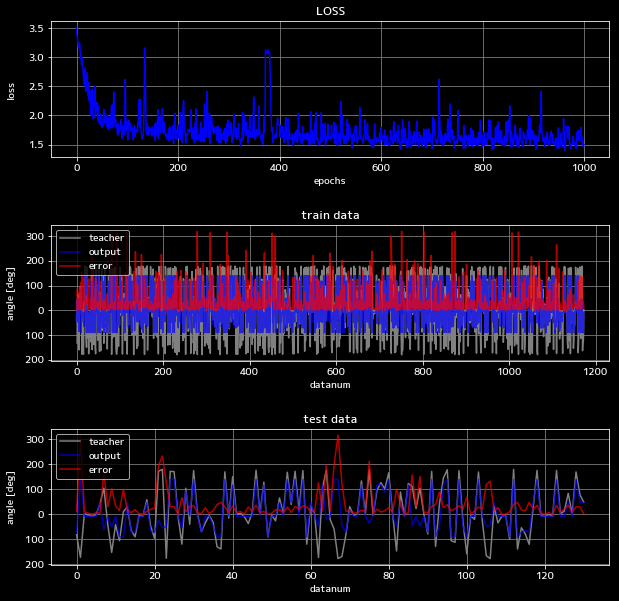

In [109]:
# グラフ表示
import matplotlib.pyplot as plt

# matplotlib設定
plt.rcParams['font.family'] = ['Yu Gothic', 'Corporate Logo Medium']

fig, axes = plt.subplots(3, 1, figsize=(10,10))

axes[0].set_title('LOSS')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('loss')
axes[0].plot(result.history['loss'], color='blue')
axes[0].grid(color='gray')

axes[1].set_title('train data')
axes[1].set_xlabel('datanum')
axes[1].set_ylabel('angle [deg]')
axes[1].plot(t_train * 180/np.pi, label='teacher', color='gray')
axes[1].plot(y_train * 180/np.pi, label='output', color='blue', alpha=0.7)
axes[1].plot(error_train * 180/np.pi, label='error', color='red', alpha=0.7)
axes[1].legend()
axes[1].grid(color='gray')

axes[2].set_title('test data')
axes[2].set_xlabel('datanum')
axes[2].set_ylabel('angle [deg]')
axes[2].plot(t_test * 180/np.pi, label='teacher', color='gray')
axes[2].plot(y_test * 180/np.pi, label='output', color='blue', alpha=0.7)
axes[2].plot(error_test * 180/np.pi, label='error', color='red', alpha=0.7)
axes[2].legend()
axes[2].grid(color='gray')

# 日本語化
# axes[0].set_title('損失関数')
# axes[1].set_title('学習データ')
# axes[2].set_title('テストデータ')

fig.subplots_adjust(hspace=0.5)
fig.align_labels()
fig.show()
fig.savefig('graph/graph.png')